# Load and clean Australia data related job dataset

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import itertools
from matplotlib import pyplot as plt

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords 
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/nanxu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nanxu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nanxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
data_jobs_NZ  = pd.read_csv('job_ad_unique_nz_14122021.csv')

In [6]:
data_jobs_NZ.head()

Unnamed: 0                                      job_title  \
0          0  Registered Electrician / Service Electricians   
1          1                                CX Data Analyst   
2          2                                   Data Analyst   
3          3                             Data Analyst Temps   
4          4                  Data Analyst - Roster Support   

                                            job_link  \
0  /job/55303114?type=promoted#searchRequestToken...   
1  /job/55103126?type=promoted#searchRequestToken...   
2  /job/55255686?type=standout#searchRequestToken...   
3  /job/55298099?type=standard#searchRequestToken...   
4  /job/55290844?type=standout#searchRequestToken...   

                       company_name                 salary job_location  \
0                    RSB Electrical                    NaN     Auckland   
1                        Perceptive                    NaN     Auckland   
2                              RELX                    NaN     Auckland   
3   Your People Recruitment Limited  $25 - $28.00 per hour        Otago   
4  Canterbury District Health Board                    NaN   Canterbury   

                                    job_requirements  \
0  ['Large stable company', 'Locally owned', 'Fun...   
1  ['Gain experience working at an innovative and...   
2  ['An opportunity to work for a leading global ...   
3                                                NaN   
4  ['x2 12 month fixed-term positions available w...   

                        job_classifiation  \
0                       Trades & Services   
1              Marketing & Communications   
2  Information & Communication Technology   
3                              Accounting   
4                    Government & Defence   

                                   short_description salary_ind  
0  Required focused, motivated Registered Electri...    0-60000  
1  We are looking for a talented Data Analyst who...    0-60000  
2  As a Data Analyst for LexisNexis you will be a...    0-60000  
3  If you are great with data and you are looking...    0-60000  
4  Excellent opportunity to join the team on a fi...    0-60000

Remove 2 columns 'Unnamed: 0' and 'date_posted'

In [8]:
NZ_jobs = data_jobs_NZ.drop(['Unnamed: 0','job_link'], axis=1)

In [10]:
NZ_jobs.columns.values

array(['job_title', 'company_name', 'salary', 'job_location',
       'job_requirements', 'job_classifiation', 'short_description',
       'salary_ind'], dtype=object)

In [11]:
NZ_jobs.isnull().sum()

job_title               0
company_name           12
salary               1359
job_location            1
job_requirements      453
job_classifiation       1
short_description       1
salary_ind              2
dtype: int64

In [12]:
job_title = NZ_jobs['job_title'].value_counts()
job_title

Senior Business Analyst               38
Business Analyst                      36
Administrator                         15
Product Owner                         11
Data Engineer                         11
                                      ..
Financial Markets Associate 4+ PQE     1
Business Analyst (contract)            1
21/781 Operational Policy Analyst      1
Restructuring Director                 1
Production Systems Support             1
Name: job_title, Length: 1354, dtype: int64

Group job title

In [39]:
NZ_jobs['salary_ind'].value_counts()

0-60000          501
60000-80000      354
150000-200000    291
120000-150000    214
80000-100000     175
100000-120000    149
200000-999999      4
Name: salary_ind, dtype: int64

In [102]:
pos = [1229,1230]
NZ_jobs.drop(NZ_jobs.index[pos], inplace=True)

job_title                                        Digital Practice Lead
company_name                                                     Theta
salary                                                             NaN
job_location                                                  Auckland
job_requirements     ['INZ Accredited employer - NZ owned technolog...
job_classifiation               Information & Communication Technology
short_description    Brilliant consultants, a people-first culture,...
salary_ind                                               120000-150000
Min_income                                                      120000
Max_income                                                      150000
avg_income                                                120000150000
Name: 1238, dtype: object

In [127]:

NZ_jobs['Min_income'] = df["salary_ind"].str[0].astype(int)
NZ_jobs['Max_income'] = df["salary_ind"].str[1].astype(int)
NZ_jobs['avg_income'] = df.salary_ind.apply(lambda x: int(x[1]) if int(x[0]) ==0 else
                                            int(x[0]) if int(x[1])==999999
                                            else (int(x[1])+int(x[0]))/2)
NZ_jobs.head()

job_title  \
0  Registered Electrician / Service Electricians   
1                                CX Data Analyst   
2                                   Data Analyst   
3                             Data Analyst Temps   
4                  Data Analyst - Roster Support   

                       company_name                 salary job_location  \
0                    RSB Electrical                    NaN     Auckland   
1                        Perceptive                    NaN     Auckland   
2                              RELX                    NaN     Auckland   
3   Your People Recruitment Limited  $25 - $28.00 per hour        Otago   
4  Canterbury District Health Board                    NaN   Canterbury   

                                    job_requirements  \
0  ['Large stable company', 'Locally owned', 'Fun...   
1  ['Gain experience working at an innovative and...   
2  ['An opportunity to work for a leading global ...   
3                                                NaN   
4  ['x2 12 month fixed-term positions available w...   

                        job_classifiation  \
0                       Trades & Services   
1              Marketing & Communications   
2  Information & Communication Technology   
3                              Accounting   
4                    Government & Defence   

                                   short_description salary_ind  Min_income  \
0  Required focused, motivated Registered Electri...    0-60000           0   
1  We are looking for a talented Data Analyst who...    0-60000           0   
2  As a Data Analyst for LexisNexis you will be a...    0-60000           0   
3  If you are great with data and you are looking...    0-60000           0   
4  Excellent opportunity to join the team on a fi...    0-60000           0   

   Max_income  avg_income  
0       60000     60000.0  
1       60000     60000.0  
2       60000     60000.0  
3       60000     60000.0  
4       60000     60000.0

In [128]:
NZ_jobs['avg_income'].value_counts()

60000.0     501
70000.0     354
175000.0    291
135000.0    208
90000.0     175
110000.0    149
200000.0      4
Name: avg_income, dtype: int64

In [129]:
NZ_jobs.drop(['salary','Min_income','Max_income'], axis =1)
NZ_jobs.head()

job_title  \
0  Registered Electrician / Service Electricians   
1                                CX Data Analyst   
2                                   Data Analyst   
3                             Data Analyst Temps   
4                  Data Analyst - Roster Support   

                       company_name                 salary job_location  \
0                    RSB Electrical                    NaN     Auckland   
1                        Perceptive                    NaN     Auckland   
2                              RELX                    NaN     Auckland   
3   Your People Recruitment Limited  $25 - $28.00 per hour        Otago   
4  Canterbury District Health Board                    NaN   Canterbury   

                                    job_requirements  \
0  ['Large stable company', 'Locally owned', 'Fun...   
1  ['Gain experience working at an innovative and...   
2  ['An opportunity to work for a leading global ...   
3                                                NaN   
4  ['x2 12 month fixed-term positions available w...   

                        job_classifiation  \
0                       Trades & Services   
1              Marketing & Communications   
2  Information & Communication Technology   
3                              Accounting   
4                    Government & Defence   

                                   short_description salary_ind  Min_income  \
0  Required focused, motivated Registered Electri...    0-60000           0   
1  We are looking for a talented Data Analyst who...    0-60000           0   
2  As a Data Analyst for LexisNexis you will be a...    0-60000           0   
3  If you are great with data and you are looking...    0-60000           0   
4  Excellent opportunity to join the team on a fi...    0-60000           0   

   Max_income  avg_income  
0       60000     60000.0  
1       60000     60000.0  
2       60000     60000.0  
3       60000     60000.0  
4       60000     60000.0

In [130]:
#what is the median salary? (calculate mean salary, too, for fun)
print("salary median: " + str(NZ_jobs["avg_income"].median()))
print("salary mean: " + str(NZ_jobs["avg_income"].mean()))

salary median: 70000.0
salary mean: 99158.73959571938


In [132]:
#creating new target variable "above_med_sal" where 0 == below or equal to the median, and 1 == above the median; any postings without salary information will have NaN values for this variable
NZ_jobs["above_med_sal"] = np.nan
NZ_jobs['above_med_sal'] = NZ_jobs.avg_income.apply(lambda x: 1 if x > NZ_jobs['avg_income'].median() else 0)
NZ_jobs.head()

job_title  \
0  Registered Electrician / Service Electricians   
1                                CX Data Analyst   
2                                   Data Analyst   
3                             Data Analyst Temps   
4                  Data Analyst - Roster Support   

                       company_name                 salary job_location  \
0                    RSB Electrical                    NaN     Auckland   
1                        Perceptive                    NaN     Auckland   
2                              RELX                    NaN     Auckland   
3   Your People Recruitment Limited  $25 - $28.00 per hour        Otago   
4  Canterbury District Health Board                    NaN   Canterbury   

                                    job_requirements  \
0  ['Large stable company', 'Locally owned', 'Fun...   
1  ['Gain experience working at an innovative and...   
2  ['An opportunity to work for a leading global ...   
3                                                NaN   
4  ['x2 12 month fixed-term positions available w...   

                        job_classifiation  \
0                       Trades & Services   
1              Marketing & Communications   
2  Information & Communication Technology   
3                              Accounting   
4                    Government & Defence   

                                   short_description salary_ind  Min_income  \
0  Required focused, motivated Registered Electri...    0-60000           0   
1  We are looking for a talented Data Analyst who...    0-60000           0   
2  As a Data Analyst for LexisNexis you will be a...    0-60000           0   
3  If you are great with data and you are looking...    0-60000           0   
4  Excellent opportunity to join the team on a fi...    0-60000           0   

   Max_income  avg_income  above_med_sal  
0       60000     60000.0              0  
1       60000     60000.0              0  
2       60000     60000.0              0  
3       60000     60000.0              0  
4       60000     60000.0              0

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',ngram_range=(1, 3), min_df = .05)

#fitting count vectorizer to job title
cvec.fit(NZ_jobs["job_title"])
#transforming job_title data into job_train
job_title = pd.DataFrame(cvec.transform(NZ_jobs["job_title"]).todense(),
                       columns=cvec.get_feature_names())


Title vs salary analysis

In [141]:
above_med_sal = pd.DataFrame(NZ_jobs['above_med_sal'])
word_observe = pd.concat([job_title, above_med_sal], axis=1)
word_observe.sample(10)

administrator  analyst  business  business analyst  consultant  data  \
1306            0.0      0.0       0.0               0.0         0.0   0.0   
1526            0.0      0.0       0.0               0.0         0.0   0.0   
446             0.0      0.0       0.0               0.0         0.0   0.0   
1564            0.0      0.0       0.0               0.0         0.0   0.0   
530             0.0      1.0       0.0               0.0         0.0   0.0   
504             0.0      1.0       0.0               0.0         0.0   1.0   
328             0.0      0.0       0.0               0.0         0.0   0.0   
1063            0.0      0.0       0.0               0.0         0.0   1.0   
955             0.0      1.0       0.0               0.0         0.0   0.0   
880             0.0      0.0       0.0               0.0         0.0   1.0   

      engineer  lead  manager  senior  above_med_sal  
1306       0.0   1.0      0.0     0.0            1.0  
1526       0.0   0.0      1.0     0.0            1.0  
446        0.0   0.0      0.0     0.0            0.0  
1564       0.0   0.0      1.0     0.0            1.0  
530        0.0   0.0      0.0     0.0            0.0  
504        0.0   0.0      0.0     0.0            0.0  
328        0.0   0.0      0.0     0.0            0.0  
1063       1.0   0.0      0.0     1.0            1.0  
955        0.0   0.0      0.0     1.0            1.0  
880        0.0   0.0      0.0     0.0            1.0

In [143]:
#Observing most common job title n-grams for both above and below median salaries
for i in range(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
    print (cw)

0 most common words
analyst             320.0
data                126.0
administrator       106.0
business             85.0
senior               68.0
business analyst     51.0
consultant           24.0
manager              23.0
lead                 21.0
engineer             20.0
above_med_sal         0.0
dtype: float64
1 most common words
above_med_sal       827.0
senior              217.0
analyst             182.0
business            139.0
manager             128.0
data                119.0
business analyst    102.0
consultant           76.0
lead                 76.0
engineer             70.0
administrator         2.0
dtype: float64


In [147]:
#creating separate lists of the top appearing words so that these can be combined and compared to create ratios of appearances in above-median vs. below-median salaries
word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)
#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T
#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = round(word_count_compare[1]/word_count_compare[0],2)
word_count_compare.drop('above_med_sal',axis=0).sort_values('above_below_ratio', ascending=False)


0      1  above_below_ratio
manager            23.0  128.0               5.57
lead               21.0   76.0               3.62
engineer           20.0   70.0               3.50
senior             68.0  217.0               3.19
consultant         24.0   76.0               3.17
business analyst   51.0  102.0               2.00
business           85.0  139.0               1.64
data              126.0  119.0               0.94
analyst           320.0  182.0               0.57
administrator     106.0    2.0               0.02

In [145]:
group_location = pd.DataFrame((NZ_jobs.groupby(['job_location']))['avg_income'].mean())
group_location.sort_values(by =['avg_income'], ascending =False)

avg_income
job_location                
Marlborough    120000.000000
Wellington     109445.727483
Auckland       101060.606061
Canterbury      93740.458015
Hawkes Bay      83076.923077
Waikato         79821.428571
Taranaki        79444.444444
Otago           78289.473684
West Coast      75833.333333
Bay of Plenty   72454.545455
Manawatu        65000.000000
Tasman          63333.333333
Northland       62000.000000
Gisborne        60000.000000
Southland       60000.000000

In [150]:
avg_income_by_region = NZ_jobs.groupby(['job_location'])['avg_income'].describe()[['count', 'mean']].sort_values(by='mean',ascending = False)
avg_income_by_region.reset_index(inplace = True)
avg_income_by_region.head()

job_location  count           mean
0  Marlborough    4.0  120000.000000
1   Wellington  433.0  109445.727483
2     Auckland  891.0  101060.606061
3   Canterbury  131.0   93740.458015
4   Hawkes Bay   13.0   83076.923077

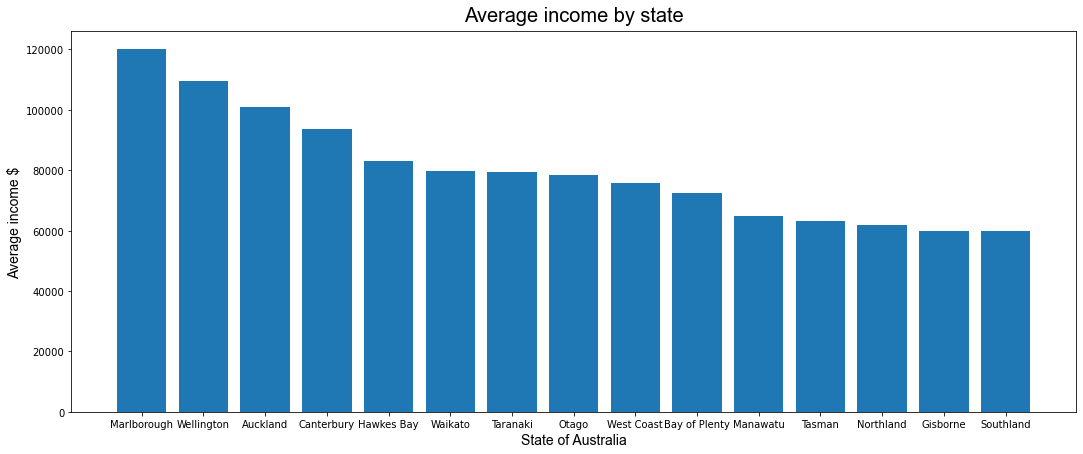

In [152]:
# Figure Size
fig = plt.figure(figsize =(18, 7))
 
# Horizontal Bar Plot
plt.bar(avg_income_by_region['job_location'],avg_income_by_region['mean'])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
axis_font = {'fontname':'Arial', 'size':'14'}

plt.title('Average income by state', **title_font)
plt.xlabel('State of Australia', **axis_font)
plt.ylabel('Average income $', **axis_font)

# Show Plot
plt.show()

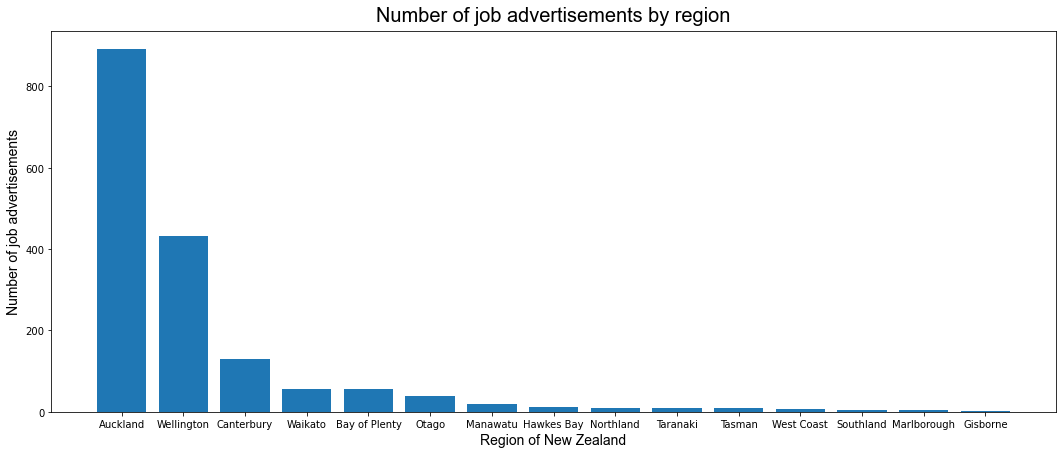

In [156]:
nu_jobs_by_region = avg_income_by_region.sort_values(by='count',ascending = False)
# Figure Size
fig = plt.figure(figsize =(18, 7))
 
# Horizontal Bar Plot
plt.bar(nu_jobs_by_region['job_location'],nu_jobs_by_region['count'])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
axis_font = {'fontname':'Arial', 'size':'14'}

plt.title('Number of job advertisements by region', **title_font)
plt.xlabel('Region of New Zealand', **axis_font)
plt.ylabel('Number of job advertisements', **axis_font)

# Show Plot
plt.show()

In [157]:
NZ_jobs['company_name'].value_counts()

Theta                                                                          41
Xero                                                                           32
Datacom                                                                        28
Beyond Recruitment - Winner - Best Innovation -2018 Global Recruiter Awards    27
Kinetic Recruitment                                                            20
                                                                               ..
Whakatane District Council                                                      1
Barfoot and Thompson                                                            1
Pinnacle Incorporated                                                           1
Your People Recruitment Limited                                                 1
TSS Sensitive Freight                                                           1
Name: company_name, Length: 732, dtype: int64

In [158]:
def skillfunc(x):
    skills = ['python','r','django',"c++",'database','sql','sas','developer','cloud','visualisation','api','java']
    text = list(map(lambda y: y.lower(), x['short_description'].split()))
    for skill in skills:        
        if skill in text:
            x[skill+'_tag'] = 1
        else:
            x[skill+'_tag'] = 0
    return x

In [159]:
NZ_jobs = NZ_jobs[NZ_jobs['short_description'].notnull()]
NZ_jobs_complete = NZ_jobs.apply(skillfunc,axis=1)
NZ_jobs_complete.sample(10)

job_title  \
150            Research Assistant - Biological Sciences   
695                                   Financial Analyst   
1195                          Lead Architect (Platform)   
761           Senior Consultant - Innovation and Growth   
704                                    Business Analyst   
1057                               Senior Data Engineer   
380   Retail Assistant - Part Time - Customhouse Qua...   
1442                                       Technical BA   
181                                     Billing Analyst   
842                           Business Systems Engineer   

                                           company_name  \
150                          The University of Auckland   
695                       Hudson - Accounting & Finance   
1195                                               Xero   
761                                                KPMG   
704                                                Xero   
1057                                Starfish Consulting   
380                          Two Degrees Mobile Limited   
1442  Beyond Recruitment - Winner - Best Innovation ...   
181         Randstad - Accounting, Banking & Finance NZ   
842                             Sime Darby Motors Group   

                                   salary job_location  \
150                                   NaN     Auckland   
695                      $80k - $90k p.a.     Auckland   
1195  Competitive salary + company shares     Auckland   
761                                   NaN     Auckland   
704                                   NaN   Wellington   
1057                                  NaN   Canterbury   
380                                   NaN   Wellington   
1442       CBD Location - WFH flexibility   Wellington   
181                         Contract/Temp     Auckland   
842                                   NaN   Canterbury   

                                       job_requirements  \
150   ['Great benefits and career opportunities with...   
695                                                 NaN   
1195  ['Lead and build an effective team of Architec...   
761   ['Apply your experience working with R&D tax i...   
704   ['Work in a high performing & fast growing env...   
1057                                                NaN   
380   ['25 hours per week', "Plan a roadie for your ...   
1442                                                NaN   
181                                                 NaN   
842   ['Do you have three years experience with busi...   

                           job_classifiation  \
150                     Government & Defence   
695                               Accounting   
1195  Information & Communication Technology   
761                    Consulting & Strategy   
704   Information & Communication Technology   
1057  Information & Communication Technology   
380               Retail & Consumer Products   
1442  Information & Communication Technology   
181                               Accounting   
842   Information & Communication Technology   

                                      short_description     salary_ind  \
150   We are seeking a Research Assistant to join ou...        0-60000   
695   Experienced Financial Analyst & Qualified CA r...    60000-80000   
1195  We are looking for a Lead Architect (Platform)...  120000-150000   
761   We support clients in navigating the complex f...    60000-80000   
704   Passionate about analysis and gathering data !...    60000-80000   
1057               Data Engineer for SaaS Database role  100000-120000   
380   Help with sales, customer service and merchand...        0-60000   
1442                                                  1  150000-200000   
181   6 month contract supporting a busy team within...        0-60000   
842   We are looking for a talented IT Business Syst...    60000-80000   

      Min_income  Max_income  ...  django_tag  c++_tag  database_tag  sql_tag  \
150            0       60000  ..

In [161]:
Total = {
        'R': NZ_jobs_complete['r_tag'].sum(), 
        'Django': NZ_jobs_complete['django_tag'].sum(), 
        'C++': NZ_jobs_complete['c++_tag'].sum(), 
        'Database': NZ_jobs_complete['database_tag'].sum(), 
        'SQL': NZ_jobs_complete['sql_tag'].sum(), 
        'SAS': NZ_jobs_complete['sas_tag'].sum(), 
        'Developmer': NZ_jobs_complete['developer_tag'].sum(), 
        'Cloud': NZ_jobs_complete['cloud_tag'].sum(), 
        'Visualisation': NZ_jobs_complete['visualisation_tag'].sum(), 
        'API': NZ_jobs_complete['api_tag'].sum(),
        'Python': NZ_jobs_complete['python_tag'].sum(),
        'Java': NZ_jobs_complete['java_tag'].sum()
        }
Total

{'R': 0,
 'Django': 0,
 'C++': 0,
 'Database': 10,
 'SQL': 5,
 'SAS': 1,
 'Developmer': 31,
 'Cloud': 23,
 'Visualisation': 0,
 'API': 4,
 'Python': 1,
 'Java': 3}

In [164]:
skillset = NZ_jobs_complete[['r_tag','django_tag','c++_tag','database_tag','sql_tag','sas_tag','developer_tag','cloud_tag','visualisation_tag','api_tag','python_tag','java_tag']]
skillset = pd.concat([job_title,skillset,above_med_sal], axis =1)
skillset.columns.values.tolist()

['administrator',
 'analyst',
 'business',
 'business analyst',
 'consultant',
 'data',
 'engineer',
 'lead',
 'manager',
 'senior',
 'r_tag',
 'django_tag',
 'c++_tag',
 'database_tag',
 'sql_tag',
 'sas_tag',
 'developer_tag',
 'cloud_tag',
 'visualisation_tag',
 'api_tag',
 'python_tag',
 'java_tag',
 'above_med_sal']

In [165]:
for i in range(2):
    skill_count = skillset[skillset["above_med_sal"]==i].sum(axis=0)
    print (i, "most skill required")
    cw = skill_count.sort_values(ascending = False).head(20)
    print (cw)

0 most skill required
analyst              320.0
data                 126.0
administrator        106.0
business              85.0
senior                68.0
business analyst      51.0
consultant            24.0
manager               23.0
lead                  21.0
engineer              20.0
developer_tag         14.0
database_tag           6.0
cloud_tag              4.0
sql_tag                2.0
sas_tag                1.0
api_tag                0.0
java_tag               0.0
python_tag             0.0
django_tag             0.0
visualisation_tag      0.0
dtype: float64
1 most skill required
above_med_sal        827.0
senior               217.0
analyst              182.0
business             139.0
manager              128.0
data                 119.0
business analyst     102.0
consultant            76.0
lead                  76.0
engineer              70.0
cloud_tag             19.0
developer_tag         17.0
api_tag                4.0
database_tag           4.0
java_tag               

In [167]:
above_med_sal =NZ_jobs.above_med_sal.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(NZ_jobs[(NZ_jobs.above_med_sal==candidate)].short_description.tolist()) for candidate in range(2)]

#lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in corpus]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
#utilize the new STOP_WORDS list
stopWords = set(stopwords.words('english'))
stopWords.update(['data','business','experience','work','team','role','Data','skills',
                 'working','We','The','including','across','You','within', 'ability',
                  'new','Business','Experience','please','This','apply','provide','services',
                 'rea','com','www','http'])
cv=CountVectorizer( stop_words=stopWords, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=above_med_sal

In [168]:
from tqdm import tqdm #used for progress bar
import math

#build an empty dataframe
t_bow_df=pd.DataFrame()

# By candidate, divide the number of times a word is said, 
# by the total number of times they've said all the words that they have said (frequency)
bow_transformed = bow.apply(lambda x: (x+1)/ (bow.loc[x.name].sum()+1), axis=1) 

for sal_indicator in tqdm(above_med_sal):
    feat_s = bow[bow.index != sal_indicator].sum()+1 #sum all the times each word was said excluding the candidate
    feat_s_all = np.sum(bow[bow.index != sal_indicator].sum()) # all the total words that were said, excluding the candidate
    tot = feat_s / feat_s_all #find the frequency of words said among other candidates
    row = bow_transformed.loc[sal_indicator] / tot #divide the candidate's array of frequency of words by all other candidates' frequency
    row = pd.DataFrame(row).T #create a df, and transform
    results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
    
    t_bow_df = pd.concat([t_bow_df, pd.DataFrame([results], index=[sal_indicator])]) #append to df


100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


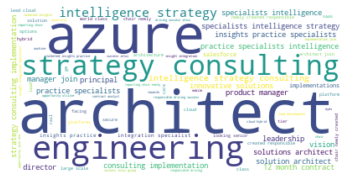

In [169]:
# create a pandas Series of the top 4000 most frequent words
text=t_bow_df.loc[1].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=t_bow_df.loc[1].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()